In [2]:
from ContNoRegret.Domains import nBox
from ContNoRegret.LossFunctions import PolynomialLossFunction, AffineLossFunction
from ContNoRegret.DualAveraging import *
import numpy as np
import ctypes
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dom = nBox([(0,1), (0,1)])
Loss = PolynomialLossFunction(dom, [1, 2, 1], [(2,0), (1,1), (0,2)])
Loss.set_bounds([0, 4])
# Loss = AffineLossFunction(dom, (1,1), 0)
# Loss.set_bounds([0, 2])
# potential = CompositeOmegaPotential(gamma=3)
potential = pNormPotential(1.5)
eta = 0.1

In [4]:
nustar(dom, potential, eta, Loss)

-11.131326442316086

In [10]:
gammas = [1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4]
nustars = [nustar(dom, CompositeOmegaPotential(gamma), eta, Loss) for gamma in gammas]

In [10]:
ps = np.linspace(1.05, 2, 10)
nustars = [nustar(dom, pNormPotential(p), eta, Loss) for p in ps]

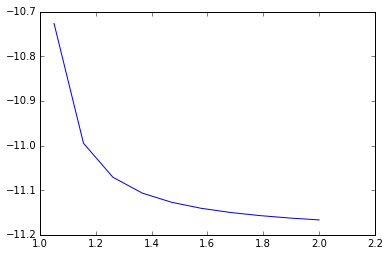

In [11]:
plt.plot(ps, nustars)

In [12]:
ps

array([ 1.05      ,  1.15555556,  1.26111111,  1.36666667,  1.47222222,
        1.57777778,  1.68333333,  1.78888889,  1.89444444,  2.        ])

In [1]:
import numpy as np
from ContNoRegret.LossFunctions import AffineLossFunction
from ContNoRegret.Domains import nBox, UnionOfDisjointnBoxes
dom = nBox([(0,1), (0,1)])
dom2 = UnionOfDisjointnBoxes([nBox([(-1,0), (-1,0)]), nBox([(0,1), (0,1)])])
T = 2500

In [2]:
loss = AffineLossFunction(dom2, [1,1], 0)

In [3]:
loss.minmax()

[-2, 2]

In [4]:
AffineLossFunction(nBox([(-1,0), (-1,0)]), [1,1], 0).minmax()

[-2, 0]

In [18]:
epsilon = 0.3
mu = (1-epsilon)*(0.5 + 0.5*np.array([np.sin(np.linspace(0, 2*np.pi, T)), np.cos(np.linspace(0, 2*np.pi, T))])).T + epsilon*dom.sample_uniform(T) 

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

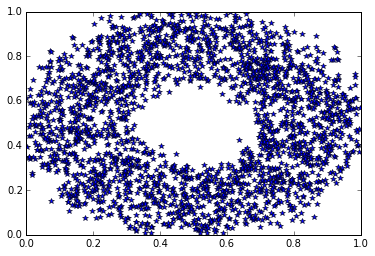

In [21]:
plt.plot(mu[:,0], mu[:,1], '*')

In [9]:
mu.shape

(2, 2500)

In [8]:
verts = dom.vertices()

In [9]:
mu = np.array([0.5,0.5])

In [10]:
verts-mu

array([[-0.5, -0.5],
       [-0.5,  0.5],
       [ 0.5, -0.5],
       [ 0.5,  0.5]])

In [12]:
verts

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [1]:

# Set up infrastructure and basic problem parameters
import multiprocessing as mp
import numpy as np
from ContNoRegret.Domains import nBox, UnionOfDisjointnBoxes
from ContNoRegret.LossFunctions import AffineLossFunction
from ContNoRegret.NoRegretAlgos import ContNoRegretProblem
from ContNoRegret.utils import random_AffineLosses, random_QuadraticLosses, plot_results, CNR_worker
from ContNoRegret.DualAveraging import ExponentialPotential, IdentityPotential, CompositeOmegaPotential, pNormPotential, LogtasticPotential

# this is the location of the folder for the results
results_path = '/Users/balandat/Documents/Code/Continuous_No-Regret/results/figures/'
desc = 'DA_Comparison'

T = 500 # Time horizon
M = 10.0 # Uniform bound on the funciton (L-infinity norm)
Lbnd = 5.0 # Uniform bound on the Lipschitz constant
N = 2500 # Number of parallel algorithm instances
Ngrid = 250000 # Number of gridpoints for the sampling step
dom = nBox([(-1,1), (-1,1)])#, (-1,1)]) # domain is a unit ball (1-norm) in 2D
# dom = UnionOfDisjointnBoxes([nBox([(-1,0), (-1,0)]), nBox([(0,1), (0,1)])])

# Now create some random loss functions
# d=2 means sampling the a vector uniformly at random from {x : ||x||_2<L}}
# lossfuncs, M = random_AffineLosses(dom, Lbnd, T, d=2)

epsilon = 0.3
mus = ((1-epsilon)*(0.5 + 0.5*np.array([np.sin(np.linspace(0,2*np.pi,T)), np.cos(np.linspace(0,2*np.pi,T))])).T 
       + epsilon*dom.sample_uniform(T))
lossfuncs = random_QuadraticLosses(dom, mus, Lbnd, M)

In [7]:
lossfuncs[0].mu

array([ 0.59170077,  0.57135666])

In [10]:
verts = dom.vertices()

In [13]:
np.vstack([verts, 2*verts])

array([[-1, -1],
       [-1,  1],
       [ 1, -1],
       [ 1,  1],
       [-2, -2],
       [-2,  2],
       [ 2, -2],
       [ 2,  2]])

In [3]:
dom2.compute_Dmu([0,0])

1.4142135623730951

In [4]:
np.zeros(2,2)

TypeError: data type not understood